Подключение библиотек и загрузка данных:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05

df = pd.read_excel("data_hw_2__upd_.xlsx")
df.head()

,InvoiceNo,CustomerID,Country,InvoiceDate,Description,TotalPrice
0,537693,12441,France,2010-12-08,WRAP I LOVE LONDON,51.11
1,537693,12441,France,2010-12-08,VINTAGE CARAVAN GIFT WRAP,43.61
2,537693,12441,France,2010-12-08,BLUE SCANDINAVIAN PAISLEY WRAP,73.08
3,537693,12441,France,2010-12-08,PAPER CHAIN KIT VINTAGE CHRISTMAS,39.17
4,537693,12441,France,2010-12-08,PAPER CHAIN KIT 50'S CHRISTMAS,57.48


Формирование выборки с учётом признака страны:

In [3]:
df_fr = df[df['Country'] == "France"]
df_de = df[df['Country'] == "Germany"]

print("Выборки одинаковой длины?\n", len(df_fr) == len(df_de))

Выборки одинаковой длины?
 True


Визуализация плотности распределения объёмов продаж для Франции и Германии:

<ipython-input-9-d96c414295cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fr['TotalPrice'], 50)
<ipython-input-9-d96c414295cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_de['TotalPrice'], 50)


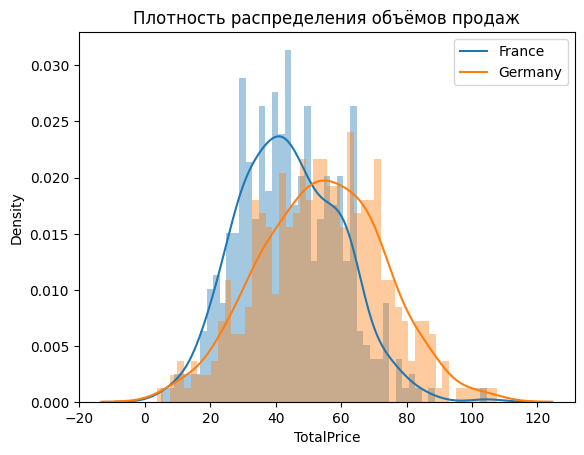

In [9]:
sns.distplot(df_fr['TotalPrice'], 50)
sns.distplot(df_de['TotalPrice'], 50)
plt.title('Плотность распределения объёмов продаж')
plt.legend(["France", "Germany"])
plt.show()

Сравнение объёмов продаж Франции и Германии:

H0: Объёмы продаж Франции не отличаются от объёмов продаж Германии

H1: Объёмы продаж Франции отличаются от объёмов продаж Германии

In [5]:
# t-критерий Стьюдента

res = ttest_ind(df_fr['TotalPrice'], df_de['TotalPrice'])
print("p-value = %.16f" % res.pvalue)

print("Отвергаем нулевую гипотезу" if res.pvalue < alpha else "Не отвергаем нулевую гипотезу")

p-value = 0.0000000000000032
Отвергаем нулевую гипотезу


In [6]:
# U-критерий Манна-Уитни

res = mannwhitneyu(df_fr['TotalPrice'], df_de['TotalPrice'])
print("p-value = %.16f" % res.pvalue)

print("Отвергаем нулевую гипотезу" if res.pvalue < alpha else "Не отвергаем нулевую гипотезу")

p-value = 0.0000000000000086
Отвергаем нулевую гипотезу


**Выводы:**

1. Распределения стремятся к нормальному.

2. Объёмы продаж Франции статистически значимо отличаются от объёмов продаж Германии